In [303]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [304]:
#data=pd.read_csv('../data/profesores_fini.csv',sep=';')
data=pd.read_excel('../data/profesores_fini.xls',sheet_name='data')
data.head()
#data.columns
#data=data.dropna()
#print(data.shape)
#print(list(data.columns))

,parte_proyecto_inclusion,sexo,edad,departamento,ciudad,unidad_educativa,nivel_educacion_maximo,anios_experiencia,tiempo_ue_actual,tiempo_ue_actual_num,...,usa_messenger,usa_instagram,usa_twiter,usa_linkedin,usa_skype,dias_uso_internet,so,conoce_soft_libre,existe_laboratorio,sabe_inclusion_digital
0,Sí,Masculino,32,Santa Cruz,Santa Cruz de la Sierra,NACIONAL COTOCA,licenciatura,20,Más de un año,15,...,Sí,No,No,No,No,7,Windows,Sí,Sí,Sí
1,Sí,Masculino,38,La Paz,El Alto,PRIMAVERA B,licenciatura,19,Más de un año,5,...,Sí,No,No,No,No,5,Windows,Sí,Sí,Sí
2,Sí,Femenino,54,La Paz,La Paz,DOMINGO FAUSTINO SARMIENTO,especialidad,20,Más de un año,5,...,Sí,Sí,Sí,Sí,Sí,7,Linux,Sí,Sí,Sí
3,Sí,Femenino,54,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,licenciatura,26,Menos de un año,6,...,No,No,No,No,No,5,Windows,Sí,Sí,Sí
4,Sí,Masculino,34,La Paz,La Paz,ABRAHAM REYES FE Y ALEGRIA,licenciatura,10,Más de un año,7,...,No,No,No,No,No,7,Windows,Sí,Sí,Sí


In [305]:
# variable dependiente
data['sabe_inclusion_digital'].value_counts()

Sí    636
No    235
Name: sabe_inclusion_digital, dtype: int64

In [306]:
# cambiando el nombre de variable
df = data.rename(columns={'sabe_inclusion_digital': 'target'})

Text(0, 0.5, 'Frecuencia de profesores')

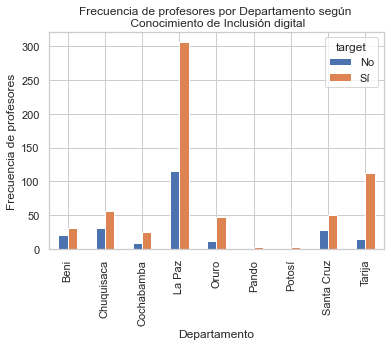

In [307]:
# grafica de target vs departamento
pd.crosstab(df.departamento,df.target).plot(kind='bar')
plt.title('Frecuencia de profesores por Departamento según \n Conocimiento de Inclusión digital')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia de profesores')
#plt.savefig('purchase_fre_job')

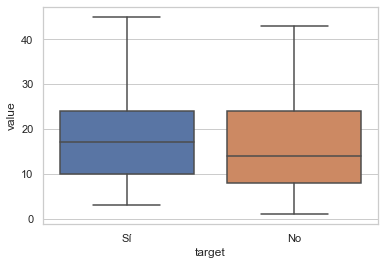

In [308]:
mdf = pd.melt(df[['anios_experiencia','target']], id_vars=['target'], var_name=['anios_experiencia'])  
ax = sns.boxplot(x="target", y="value", data=mdf)
plt.show()

In [309]:
# no existe valores atipicos, los años de experiencia en ensañanza es reciente con el conocimiento en inclusion digital.

In [310]:
label_encoder = preprocessing.LabelEncoder()
df['y'] = label_encoder.fit_transform(df['target'])
df['pproyinc'] = label_encoder.fit_transform(df['parte_proyecto_inclusion'])
df['neducmax'] = label_encoder.fit_transform(df['nivel_educacion_maximo'])
df['gender'] = label_encoder.fit_transform(df['sexo'])
df['areaimpa'] = label_encoder.fit_transform(df['area_imparte'])
df['curso_tec'] = label_encoder.fit_transform(df['paso_curso_tec'])
df['celsmarthp'] = label_encoder.fit_transform(df['tiene_smartphone'])
df['tienecelul'] = label_encoder.fit_transform(df['tiene_celular'])
df['pccasa'] = label_encoder.fit_transform(df['pc_casa'])
#df['laptopescr'] = label_encoder.fit_transform(df['laptop_escritorio'])
df['existe_labo'] = label_encoder.fit_transform(df['existe_laboratorio'])
df['conocisoftlibre'] = label_encoder.fit_transform(df['conoce_soft_libre'])
#df['pcinternet'] = label_encoder.fit_transform(df['pc_internet'])
#df['internetcole'] = label_encoder.fit_transform(df['internet_colegio'])
df['usayoutube'] = label_encoder.fit_transform(df['usa_youtube'])
df['pcvideos'] = label_encoder.fit_transform(df['pc_videos'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   parte_proyecto_inclusion  871 non-null    object 
 1   sexo                      871 non-null    object 
 2   edad                      871 non-null    int64  
 3   departamento              871 non-null    object 
 4   ciudad                    871 non-null    object 
 5   unidad_educativa          871 non-null    object 
 6   nivel_educacion_maximo    871 non-null    object 
 7   anios_experiencia         871 non-null    int64  
 8   tiempo_ue_actual          871 non-null    object 
 9   tiempo_ue_actual_num      871 non-null    int64  
 10  area_imparte              871 non-null    object 
 11  paso_curso_tec            871 non-null    object 
 12  curso                     591 non-null    object 
 13  pc_casa                   871 non-null    object 
 14  laptop_esc

In [311]:
nomcol = ['pproyinc','neducmax','gender','areaimpa','curso_tec','edad','anios_experiencia','celsmarthp',
          'tienecelul','pccasa','tiempo_ue_actual_num','dias_uso_internet','existe_labo','conocisoftlibre',
          'usayoutube','pcvideos','y']
df1=df[nomcol]
df1.isnull().sum()
df1.head()

,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,celsmarthp,tienecelul,pccasa,tiempo_ue_actual_num,dias_uso_internet,existe_labo,conocisoftlibre,usayoutube,pcvideos,y
0,1,2,1,0,1,32,20,1,1,1,15,7,1,1,1,1,1
1,1,2,1,1,1,38,19,1,1,1,5,5,1,1,1,1,1
2,1,1,0,1,1,54,20,0,1,1,5,7,1,1,1,1,1
3,1,2,0,1,1,54,26,1,1,1,6,5,1,1,1,0,1
4,1,2,1,0,1,34,10,1,1,1,7,7,1,1,1,1,1


In [312]:
# contabilizamos el porcentaje de NaN, no existen
total = df1.isnull().sum().sort_values(ascending=False)
total

y                       0
celsmarthp              0
neducmax                0
gender                  0
areaimpa                0
curso_tec               0
edad                    0
anios_experiencia       0
tienecelul              0
pcvideos                0
pccasa                  0
tiempo_ue_actual_num    0
dias_uso_internet       0
existe_labo             0
conocisoftlibre         0
usayoutube              0
pproyinc                0
dtype: int64

(array([385., 184., 128.,  72.,  57.,  21.,  16.,   6.,   1.,   1.]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ]),
 <BarContainer object of 10 artists>)

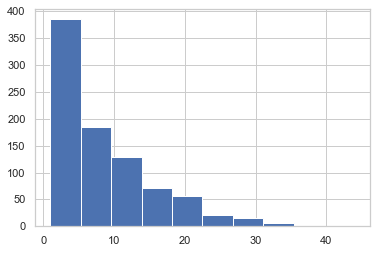

In [313]:
plt.hist(df1['tiempo_ue_actual_num'])

(array([  9.,  21.,   0.,  50.,   0.,  58., 112.,   0., 167., 454.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

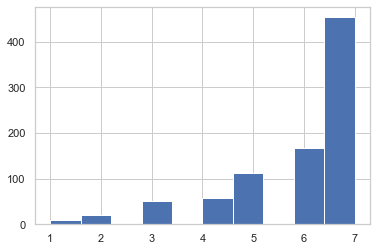

In [314]:
plt.hist(df1['dias_uso_internet'])

In [315]:
df1['tiempo_ue_actual_num'] = df1['tiempo_ue_actual_num'].fillna(df1['tiempo_ue_actual_num'].mean())
df1['dias_uso_internet'] = df1['dias_uso_internet'].fillna(df1['dias_uso_internet'].mean())
df1.head()

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,celsmarthp,tienecelul,pccasa,tiempo_ue_actual_num,dias_uso_internet,existe_labo,conocisoftlibre,usayoutube,pcvideos,y
0,1,2,1,0,1,32,20,1,1,1,15,7,1,1,1,1,1
1,1,2,1,1,1,38,19,1,1,1,5,5,1,1,1,1,1
2,1,1,0,1,1,54,20,0,1,1,5,7,1,1,1,1,1
3,1,2,0,1,1,54,26,1,1,1,6,5,1,1,1,0,1
4,1,2,1,0,1,34,10,1,1,1,7,7,1,1,1,1,1


In [316]:
X=df1[df1.columns[:-1]]
y=df1['y']
X.head()

,pproyinc,neducmax,gender,areaimpa,curso_tec,edad,anios_experiencia,celsmarthp,tienecelul,pccasa,tiempo_ue_actual_num,dias_uso_internet,existe_labo,conocisoftlibre,usayoutube,pcvideos
0,1,2,1,0,1,32,20,1,1,1,15,7,1,1,1,1
1,1,2,1,1,1,38,19,1,1,1,5,5,1,1,1,1
2,1,1,0,1,1,54,20,0,1,1,5,7,1,1,1,1
3,1,2,0,1,1,54,26,1,1,1,6,5,1,1,1,0
4,1,2,1,0,1,34,10,1,1,1,7,7,1,1,1,1


In [317]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
os_X_train, os_X_test, os_y_train, os_y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=25)

In [318]:
#X_train.shape
#print(X.shape)
#print(os_data_X.shape)
print(y.value_counts())
print(os_data_y.value_counts())

1    636
0    235
Name: y, dtype: int64
y
1    441
0    441
dtype: int64


**Modelo**

In [328]:
reg = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)
reg.fit(os_X_train,os_y_train)
reg

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=-1,
          penalty='l2', random_state=25, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [320]:
pred=reg.predict(os_X_test)
reg_cv=cross_val_score(reg, os_X_train, os_y_train, cv=10).mean()

C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\ivan.aliaga\.conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ivan.ali

In [321]:
print('Coef de determinación: %.3f' % reg.score(X_test, y_test))
print('Cross-validation $R^2$: %0.3f' % reg_cv)
print('Precision: %.3f' % precision_score(os_y_test, pred))
print('Proporción de verdaderos positivos : %.3f' % recall_score(os_y_test, pred))
print('Contribución de la precision ponderada(F1 score): %.3f' % f1_score(os_y_test, pred))

Coef de determinación: 0.714
Cross-validation $R^2$: 0.734
Precision: 0.703
Proporción de verdaderos positivos : 0.754
Contribución de la precision ponderada(F1 score): 0.727


In [322]:
y_pred =reg.predict(os_X_test)
print('Precición de modelo logistico para clasificar segun la data test: {:.2f}'.format(reg.score(os_X_test, os_y_test)))

Precición de modelo logistico para clasificar segun la data test: 0.71


In [323]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(os_y_test, y_pred)
print(confusion_matrix)

[[ 83  44]
 [ 34 104]]


In [324]:
from sklearn.metrics import classification_report
print(classification_report(os_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       127
           1       0.70      0.75      0.73       138

   micro avg       0.71      0.71      0.71       265
   macro avg       0.71      0.70      0.70       265
weighted avg       0.71      0.71      0.70       265



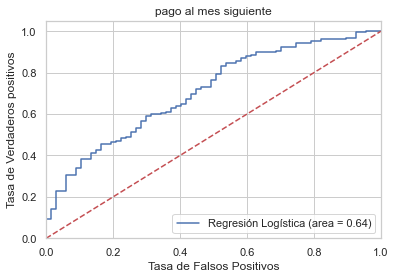

In [325]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('pago al mes siguiente')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusión

* Se puede apreciar que modelo de regresión logistica obtiene una preción del 70%, con una variabilidad explida de la variable dependiente 'conocimiento de inclusión digital' del 70% por parte de las variables independientes, adémas se observa un aumento significativo de la tasa de verdaderos positivos hasta el 75%.
* Se pudo constatar que en la seleccion de variables para el Modelo Logístico se utilizó la tecnica de SMOTE para el equilibrio de la varaible de respuesta. 
* Se observó que las variables como : "existe laboratorio de computación","forma parte de un proyecto de inclusión" y  "conocimiento de software libre" son altamente significativalas  para la explicación del conocimiento de inclusión digital.